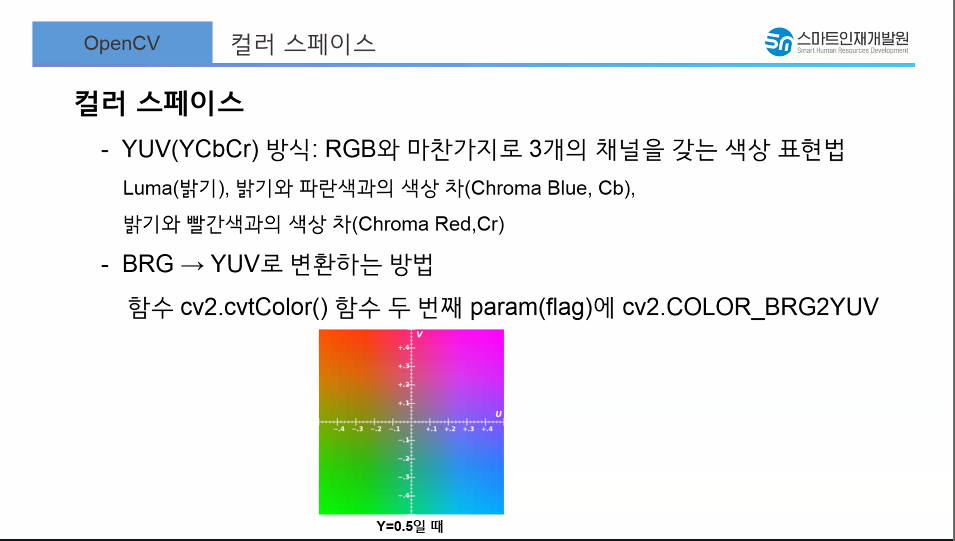

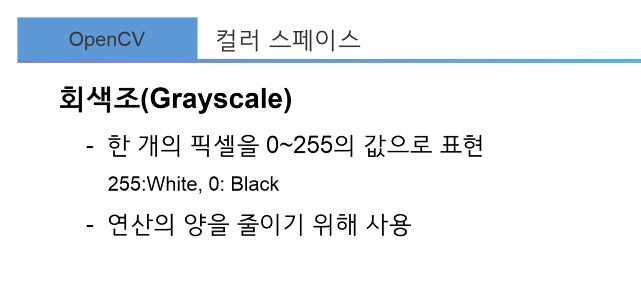

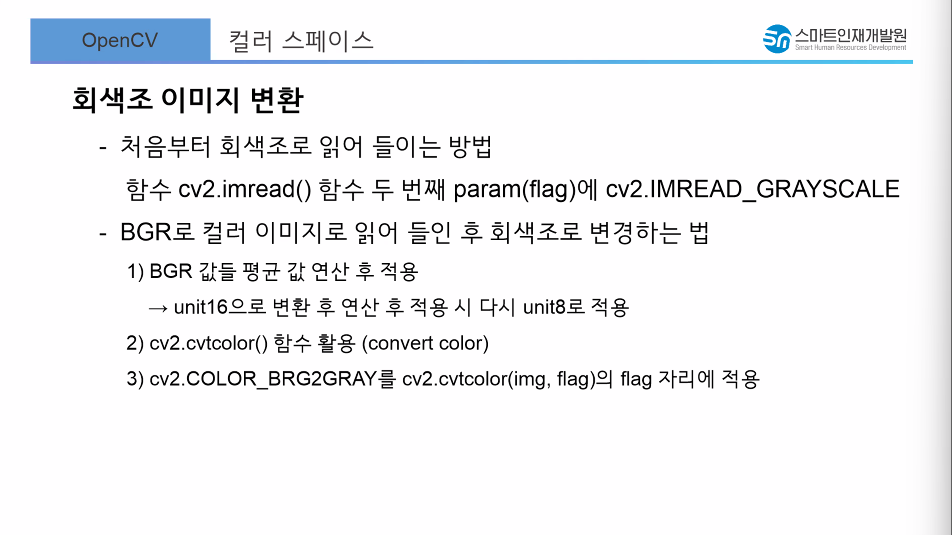


- unit 8 - 255

In [1]:
import cv2
import numpy as np


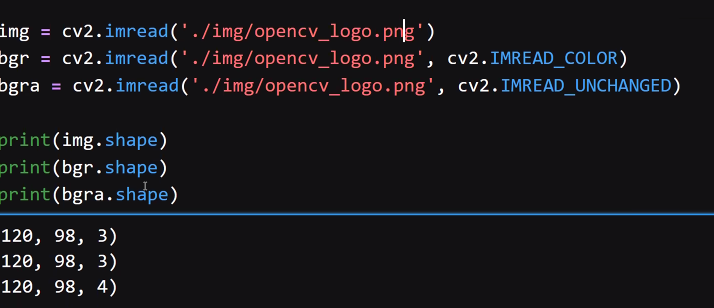

In [4]:
bgra = cv2.imread('.img/opencv_logo.png',cv2.IMREAD_UNCHANGED)
print(bgra.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

In [5]:
cv2.imshow('bgr',bgr)
cv2.imshow('bgra',bgra)

NameError: name 'bgr' is not defined

In [119]:
import matplotlib.pyplot as plt

img = cv2.imread('./img/rainbow_bgra.jpg',cv2.IMREAD_UNCHANGED)

#alpha 채널 추가
b,g,r = cv2.split(img)
alpha = np.ones(b.shape, dtype=b.dtype) * 30
img_BGRA = cv2.merge((b,g,r,alpha))

bgr = cv2.imread('./img/rainbow_brgr.jpg', cv2.IMREAD_COLOR)
bgr = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

bgra = cv2.imread('./img/rainbow_bgra.jpg',cv2.IMREAD_UNCHANGED)
bagra = cv2.cvtColor(bgra, cv2.COLOR_BGR2RGB)
# RGB를 GRA로 변경
bagra = cv2.cvtColor(bgra, cv2.COLOR_BGR2GRA)

fig = plt.figure(figsize = (10,8))
plt.subplot(131), plt.axis('off'), plt.imshow(bgr),plt.title('original')
plt.subplot(132), plt.axis('off'), plt.imshow(bgr),plt.title('color')
plt.subplot(133), plt.axis('off'), plt.imshow(bgr[:,:,3]),plt.title('UNCHANGED')
plt.show()

ValueError: not enough values to unpack (expected 3, got 0)

In [11]:
red_bgr = np.array([[[255,0,0]]], dtype = np.uint8)
green_bgr = np.array([[[0,255,0]]], dtype= np.uint8)
blue_bgr = np.array([[[0,0,255]]], dtype= np.uint8)
# 노란색
yellow_bgr = np.array([[[255,255,0]]], dtype= np.uint8)

red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV)
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV)
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV)
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV)

print(f'red:{red_hsv}')
print(f'grren:{red_hsv}')
print(f'blue:{red_hsv}')
print(f'yellow:{red_hsv}')

red:[[[120 255 255]]]
grren:[[[120 255 255]]]
blue:[[[120 255 255]]]
yellow:[[[120 255 255]]]


In [13]:
#yub 컬러 스페이스
# 픽셀의 밝기를 명확하게 볼 수 있다
dark = np.array([[[0,0,0]]], dtype = np.uint8)
mid = np.array([[[127,127,127]]], dtype = np.uint8)
bright = np.array([[[255,255,255]]], dtype = np.uint8)

dark_yuv = cv2.cvtColor(dark, cv2.COLOR_BGR2YUV)
mid_yuv = cv2.cvtColor(mid, cv2.COLOR_BGR2YUV)
bright_yuv = cv2.cvtColor(bright, cv2.COLOR_BGR2YUV)

print(f"dark: {dark_yuv}")
print(f"middle: {mid_yuv}")
print(f"bright: {bright_yuv}")


dark: [[[  0 128 128]]]
middle: [[[127 128 128]]]
bright: [[[255 128 128]]]


### Grayscale 변환

<Figure size 1000x800 with 0 Axes>

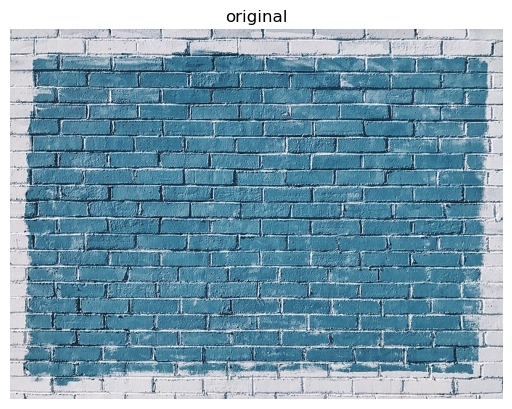

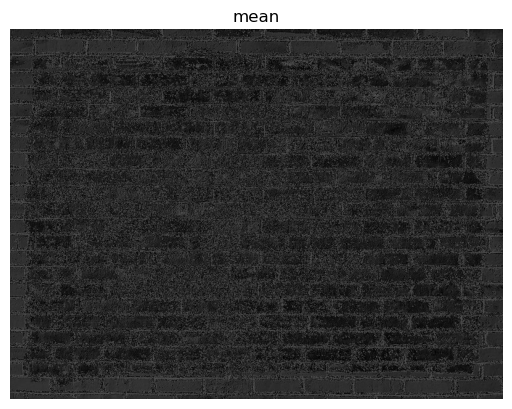

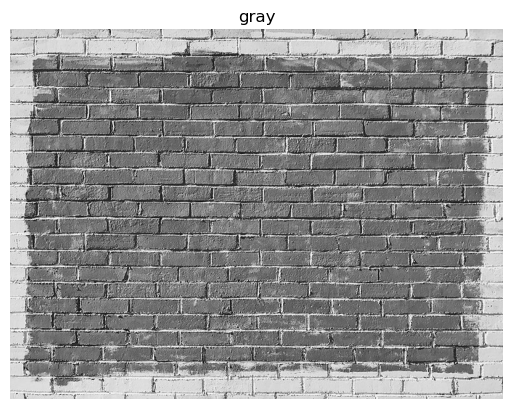

In [16]:
# 회색조로 바꾸기
img = cv2.imread('./img/bricks.jpeg')
b,g,r = cv2.split(img) # 채널별 분리
gray1 = ((b+g+r)/3).astype(np.uint8)  # 평균 연산 후 uint8 변환

img2 = img.astype(np.uint16)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# BGR 채널로 RGB로 바꾸겠다
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(gray1, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(gray2, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,8))
plt.show(131), plt.axis('off'), plt.imshow(img), plt.title('original')
plt.show(132), plt.axis('off'), plt.imshow(gray1), plt.title('mean')
plt.show(133), plt.axis('off'), plt.imshow(gray2), plt.title('gray')
plt.show()

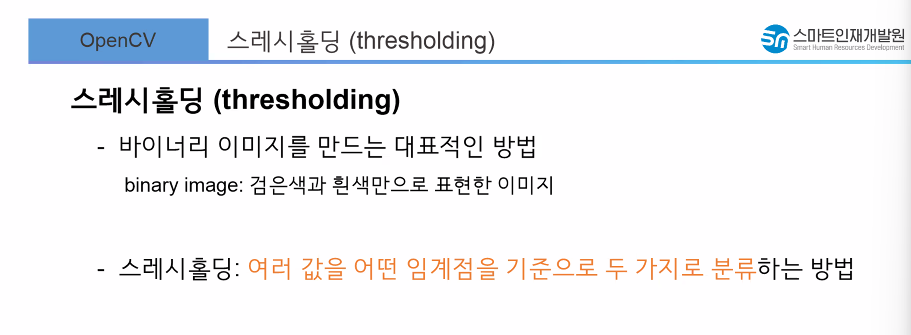


(<Axes: title={'center': 'cv2. threshold'}>,
 (np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0)),
 Text(0.5, 1.0, 'cv2. threshold'))

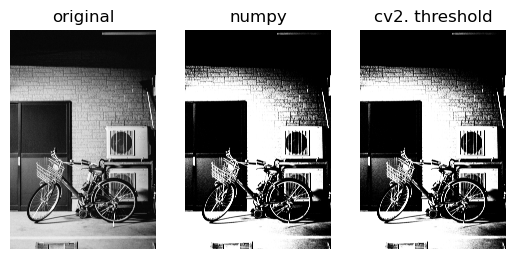

In [19]:
# 스레시홀딩 - 임계값을 기준으로 색깔 구분
img = cv2.imread('./img/bicycle.jpg', cv2.IMREAD_GRAYSCALE)

thresh_np = np.zeros_like(img)
thresh_np[img>127] = 255 # 127보다 큰 값만 255로 변경

ret, thresh_cv = cv2. threshold(img, 127, 255, cv2.THRESH_BINARY)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
thresh_np = cv2.cvtColor(thresh_np,cv2.COLOR_BGR2RGB)
thresh_cv = cv2.cvtColor(thresh_cv,cv2.COLOR_BGR2RGB)

plt.subplot(131), plt.axis('off'), plt.imshow(img), plt.title('original')
plt.subplot(132), plt.axis('off'), plt.imshow(thresh_np), plt.title('numpy')
plt.subplot(133), plt.axis('off'), plt.imshow(thresh_cv), plt.title('cv2. threshold')

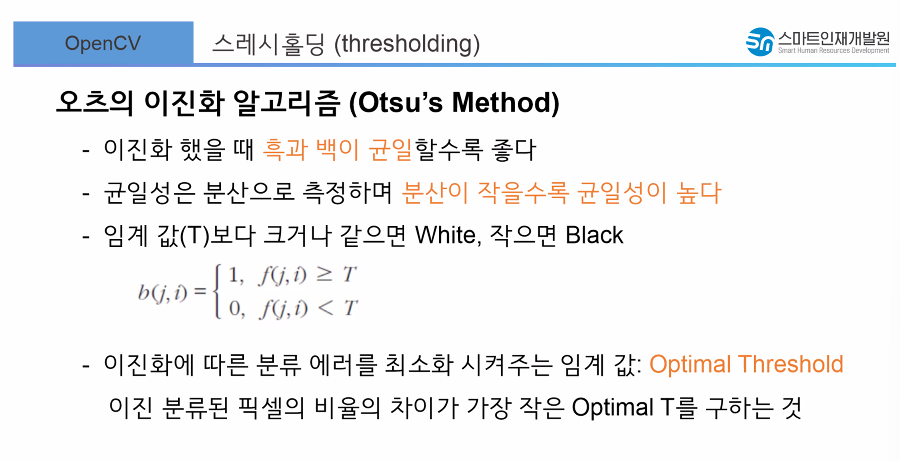

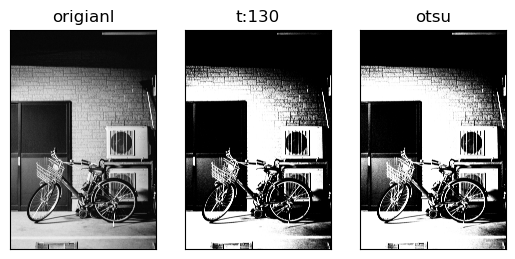

In [26]:
# 이진하에 따른 에러를 최소화시켜주는 임계값: Optimal Threshold
img = cv2.imread('./img/bicycle.jpg', cv2.IMREAD_GRAYSCALE)
t1,t_130 = cv2.threshold(img,130,255,cv2.THRESH_BINARY)
# 오츠의 알고리즘
t,t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imgs = {'origianl':img, 't:130':t_130, 'otsu':t_otsu}

for i, (key,value) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(key)
    plt.imshow(value,cmap = 'gray')
    plt.xticks([]) #plt.axis('off')
    plt.yticks([]) 
plt.show()    

In [28]:
print(t1)

130.0


In [27]:
#스레시홀딩값

print(t)

105.0


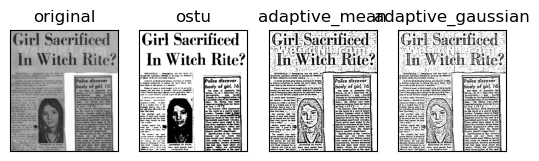

In [35]:
img = cv2.imread('./img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE)
blk_size = 9
c =5

ret,th1 = cv2.threshold(img, 0,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, blk_size ,c)
th3 = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,blk_size,c)

imgs = {'original':img, 'ostu': th1, 'adaptive_mean':th2,'adaptive_gaussian':th3}

for i,(key,value) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()



In [37]:
#  이미지연산
# 픽셀연산

a = np.array([[1,2]], dtype = np.uint8)
b = np.array([[10,20]],dtype= np.uint8)

#1 -> True, 0 -> False
mask = np.array([[1,0]], dtype=np.uint8)

c2 = cv2.add(a,b,None, mask) # [[11,0]]
# dst=b**는 결과를 b 배열에 저장
c1 = cv2.add(a,b,b,mask)    # [[11,20]]

print(c2)
print(c1)



[[11  0]]
[[11 20]]


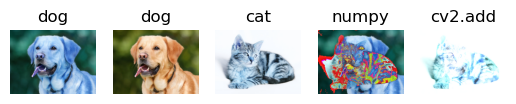

In [48]:
# 알파블렌딩 - 가중치a를 통해 조정
dog = cv2.imread('./img/dog.jpg')
cat = cv2.imread('./img/cat.jpg')

img3 = dog+cat
img4 = cv2.add(dog,cat)

# BGR2RGB
#[:,:,::-1] cv2.cvtVolor(BGR2RGB)
# plt.subplot(1, 5, 1)와 subplot(151)과 동일
plt.subplot(151),plt.axis('off'),plt.imshow(dog),plt.title('dog')
plt.subplot(152),plt.axis('off'),plt.imshow(cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)),plt.title('dog')
# plt.subplot(141),plt.axis('off'),plt.imshow(dog[:,:,::-1]),plt.title('dog')
plt.subplot(153),plt.axis('off'),plt.imshow(cat),plt.title('cat')
plt.subplot(154),plt.axis('off'),plt.imshow(img3),plt.title('numpy')
plt.subplot(155),plt.axis('off'),plt.imshow(img4),plt.title('cv2.add')
plt.show()

In [ ]:
win_name = 'Alpha Blending'
tracker_bar = 'fade'

def onChage(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha. img2,alpha,0)
    cv2.imshow(win_name, dst)

cv2.imshow(win_name,img1)
cv2.createTracker(tracker_bar,win_name,0,100,onChage)

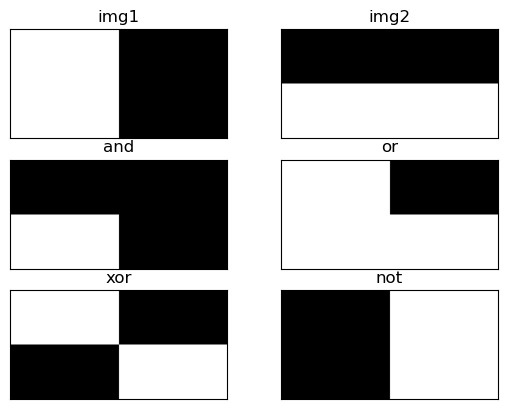

In [55]:
img1 = np.zeros((200,400),dtype=np.uint8)
img2 = np.zeros((200,400),dtype=np.uint8)

img1[:,:200] = 255
# 밑에 절반을 255로 바꾸겠다
img2[100:200,:]=255
bitAnd = cv2.bitwise_and(img1,img2)
bitOr = cv2.bitwise_or(img1,img2)
bitXor = cv2.bitwise_xor(img1,img2)
bitNot = cv2.bitwise_not(img1)

imgs = {'img1':img1,'img2':img2,'and':bitAnd,'or':bitOr,'xor':bitXor, 'not':bitNot}
for i,(key,value) in enumerate (imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(key)
    plt.imshow(value,'gray')
    plt.xticks([])
    plt.yticks([])
plt.show()
# plt.subplot(321), plt.axis('off'), plt.imshow(img1), plt.title('img1')
# plt.subplot(322), plt.axis('off'), plt.imshow(img2), plt.title('img2')
# plt.subplot(323), plt.axis('off'), plt.imshow(bitAnd), plt.title('and')
# plt.subplot(324), plt.axis('off'), plt.imshow(bitOr), plt.title('or')
# plt.subplot(325), plt.axis('off'), plt.imshow(bitXor), plt.title('xor')
# plt.subplot(326), plt.axis('off'), plt.imshow(bitNot), plt.title('not')


(<Axes: title={'center': 'mask_not'}>,
 (np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0)),
 Text(0.5, 1.0, 'mask_not'))

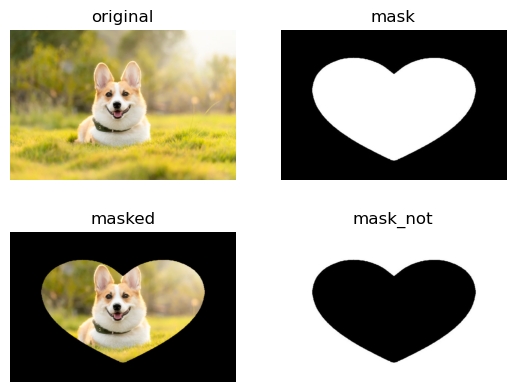

In [66]:
# 마스크가 반대로 나오면 not 연산 안쓰면 된다
img = cv2.imread('./img/dog2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
mask = cv2.imread('./img/mask_heart.jpg')
mask = cv2.resize(mask, (img.shape[1],img.shape[0]))
mask_not = cv2.bitwise_not(mask)

# masked = cv2.bitwise_and(img,mask_not)
masked = cv2.bitwise_and(img,mask)
# result = cv2.add(masked,mask)
result = cv2.add(masked,mask_not)

plt.subplot(221),plt.axis('off'),plt.imshow(img),plt.title('original')
plt.subplot(222),plt.axis('off'),plt.imshow(mask),plt.title('mask')
plt.subplot(223),plt.axis('off'),plt.imshow(masked),plt.title('masked')
plt.subplot(224),plt.axis('off'),plt.imshow(mask_not),plt.title('mask_not')

(<Axes: title={'center': 'result'}>,
 (np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0)),
 Text(0.5, 1.0, 'result'))

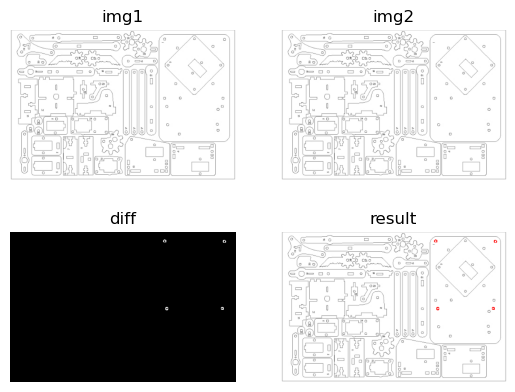

In [72]:
img1 = cv2.imread('./img/drawing1.jpg')
img2 = cv2.imread('./img/drawing2.jpg')

# # 이미지 해상도가 다를
# img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

diff = cv2.absdiff(img1_gray, img2_gray)

_, diff = cv2.threshold(diff,1,255,cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff,cv2.COLOR_GRAY2BGR)
diff = cv2.cvtColor(diff,cv2.COLOR_GRAY2RGB)
diff_red[:,:,0] = 0

result = cv2.bitwise_xor(img2,diff_red)
plt.subplot(221),plt.axis('off'),plt.imshow(img1),plt.title('img1')
plt.subplot(222),plt.axis('off'),plt.imshow(img2),plt.title('img2')
plt.subplot(223),plt.axis('off'),plt.imshow(diff),plt.title('diff')
plt.subplot(224),plt.axis('off'),plt.imshow(result),plt.title('result')

이미지 합성과 마스킹

In [76]:
img_fg = cv2.imread('./img/opencv_logo.png',cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('./img/background.jpg')

img_fg.shape
_,mask = cv2.threshold (img_fg[:,:,3],1,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

cv2.imshow('mask',mask)
cv2.imshow('mask_inv',mask_inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [79]:
img_fg = cv2.cvtColor(img_fg,cv2.COLOR_BGRA2BGR)
h,w = img_fg.shape[:2] # (h,w,color)
roi = img_bg[10:10+h,10:10+w]


In [80]:
cv2.imshow('roi',roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [83]:
masked_fg = cv2.bitwise_and(img_fg,img_fg,mask=mask)
masked_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)

cv2.imshow('maske_fg',maske_fg)
cv2.imshow('masked_bg',masked_bg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [84]:
added= masked_fg + masked_bg
cv2.imshow('added',masked_bg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [89]:
img_bg[10:10+h,10:10+w] = added# 원본에 첨부
cv2.imshow('img_bg',img_bg)
cv2.waitKey(0)
cv2.destroyAllWindows()

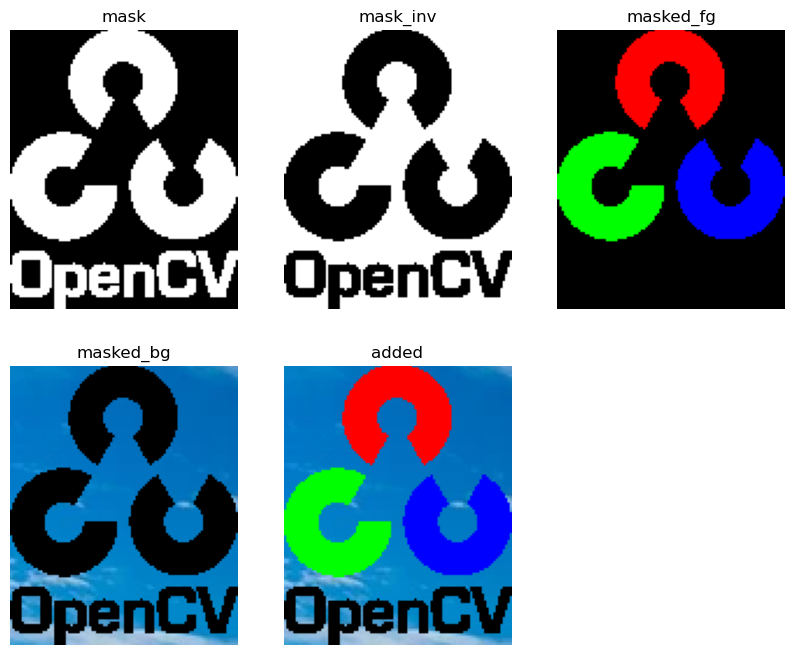

In [91]:
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
mask_inv = cv2.cvtColor(mask_inv, cv2.COLOR_GRAY2RGB)
masked_fg = cv2.cvtColor(masked_fg, cv2.COLOR_BGR2RGB)
masked_bg = cv2.cvtColor(masked_bg, cv2.COLOR_BGR2RGB)
added = cv2.cvtColor(added, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10, 8))
plt.subplot(231), plt.axis('off'), plt.imshow(mask), plt.title("mask")
plt.subplot(232), plt.axis('off'), plt.imshow(mask_inv), plt.title("mask_inv")
plt.subplot(233), plt.axis('off'), plt.imshow(masked_fg), plt.title("masked_fg")
plt.subplot(234), plt.axis('off'), plt.imshow(masked_bg), plt.title("masked_bg")
plt.subplot(235), plt.axis('off'), plt.imshow(added), plt.title("added")
plt.show()

색상에 따른 분류를 하기에 RGB 보다 HSV의 컬러 스페이스 활용

In [99]:
img = cv2.imread('./img/cube.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

blue_low = np.array([90,50,50])
blue_high= np.array([120,255,255])
green_low = np.array([45,50,50])
green_high = np.array([75,255,255])
yellow_low = np.array([25,50,50])
yellow_high = np.array([35,255,255])
red_low1 = np.array([0,50,50])
red_high1 = np.array([15,255,255])
red_low2 = np.array([165,50,50])
red_high2 = np.array([180,255,255])

#cv2. inRange(hsv,Lower,upper)
mask_blue = cv2.inRange(hsv,blue_low,blue_high)
mask_green = cv2.inRange(hsv,green_low,green_high)
mask_yellow = cv2.inRange(hsv,yellow_low,yellow_high)
mask_red1 = cv2.inRange(hsv,red_low1,red_high1)
mask_red2 = cv2.inRange(hsv,red_low2,red_high2)



(<Axes: title={'center': 'red'}>,
 (np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0)),
 Text(0.5, 1.0, 'red'))

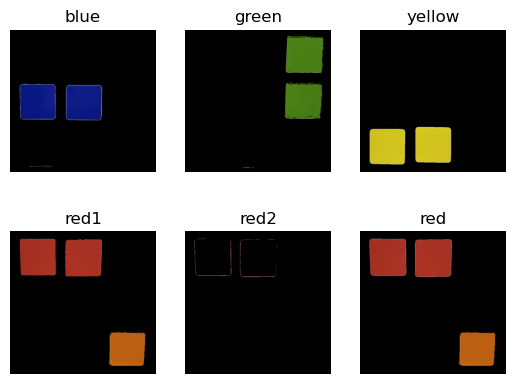

In [100]:
res_blue = cv2.bitwise_and(img,img,mask=mask_blue)
res_green = cv2.bitwise_and(img,img,mask=mask_green)
res_yellow = cv2.bitwise_and(img,img,mask=mask_yellow)
res_red1 = cv2.bitwise_and(img,img,mask=mask_red1)
res_red2 = cv2.bitwise_and(img,img,mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)

plt.subplot(2,3,1),plt.axis('off'),plt.imshow(res_blue[:,:,::-1]),plt.title('blue')
plt.subplot(2,3,2),plt.axis('off'),plt.imshow(res_green[:,:,::-1]),plt.title('green') 
plt.subplot(2,3,3),plt.axis('off'),plt.imshow(res_yellow[:,:,::-1]),plt.title('yellow')
plt.subplot(2,3,4),plt.axis('off'),plt.imshow(res_red1[:,:,::-1]),plt.title('red1')
plt.subplot(2,3,5),plt.axis('off'),plt.imshow(res_red2[:,:,::-1]),plt.title('red2')
plt.subplot(2,3,6),plt.axis('off'),plt.imshow(res_red[:,:,::-1]),plt.title('red')

크로마키

In [102]:
# 사람틀 추출
# 색상기준으로 추출
img1 = cv2.imread('./img/man_chromakey.jpg')
img2 = cv2.imread('./img/street.jpg')

height1,width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]

x = (width2 - width1)//2
y = (height2 - height1)
w = x + width1
h = y+height1

# 이미지를 10x10 픽셀만큼 모든 색깔을 가져옴
chromakey = img1[:10,:10,:]
offset = 20  # 경험적,실험적으로 조정해 나가는 값

hsv_chroma = cv2.cvtColor(chromakey,cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)

chroma_h = hsv_chroma[:,:,0]
lower = np.array([chroma_h.min()-offset, 100,100])
upper = np.array([chroma_h.max()+offset,255,255])

mask = cv2.inRange(hsv_img,lower,upper)
# cv2.imshow('mask',mask)
# cv2.waitKey(0)
# cv2.distoryAllWindows()

mask = cv2.inRange(hsv_img,lower,upper)
mask_inv = cv2.bitwise_not(mask)

roi = img2[y:h, x:w]

fg = cv2.bitwise_and(img1, img1,mask = mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)

added = masked_fg _+ 
img2[y:h,x:w] = fg+bg
7\4
1v2.imshow('chromakey',img2)
cv2.waitKey(0)
cv2.distoryAllWindows()



AttributeError: module 'cv2' has no attribute 'distoryAllWindows'

cv2.NORMAl_CLONE 

In [106]:
img1 = cv2.imread('./img/drawing.jpg')
img2 = cv2.imread('./img/my_hand.jpg')

# 이미지의 모든 영역을 255로 , 전체 이미지를 다 쓰기 위해
mask = np.full_like(img1,255)

height,width = img2.shape[:2]
center =( width//2, height//2)

normal = cv2.seamlessClone(img1,img2,mask,center,cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(img1, img2, mask ,center,cv2.MIXED_CLONE)

cv2.imshow('normal',normal)
cv2.imshow('mix',mixed)
cv2.waitKey(0)
cv2.distoryAllWindows()


AttributeError: module 'cv2' has no attribute 'distoryAllWindows'

히스토그램

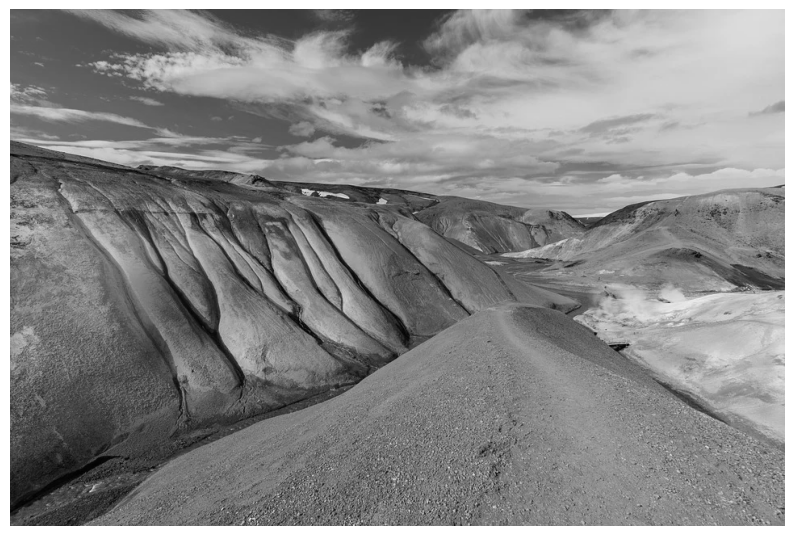

(<matplotlib.image.AxesImage at 0x1ad68608a50>,
 (np.float64(-0.5), np.float64(959.5), np.float64(639.5), np.float64(-0.5)),
 None)

In [108]:
img = cv2.imread('./img/background.jpg', cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10,10))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img), plt.axis('off'),plt.show()

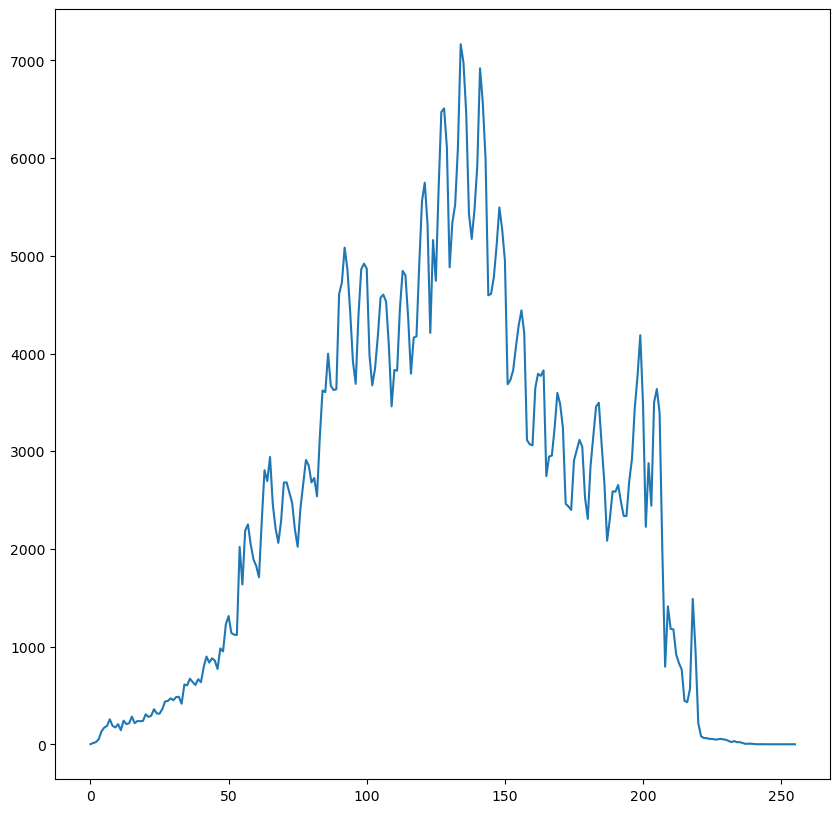

In [109]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
fig = plt.figure(figsize=(10,10))
plt.plot(hist)

In [110]:
print(img.shape)
# 픽셀의 수 
print(hist.sum())


(640, 960, 3)
614400.0


In [111]:
img = cv2.imread('./img/background.jpg')

fig = plt.figure(figsize = (10,10)
                 

_IncompleteInputError: incomplete input (2968601435.py, line 4)

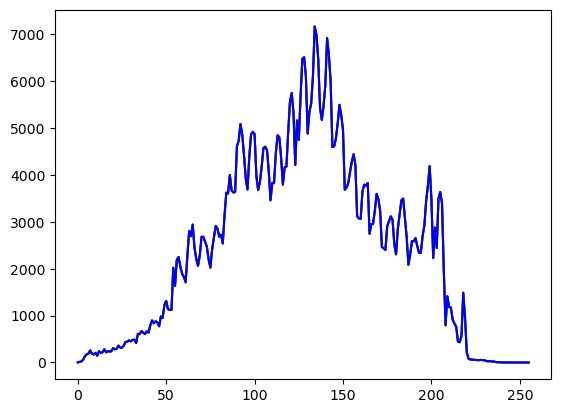

In [113]:
# R,G,B 3개의 채널
channels = cv2.split(img) # -> img의 rgb 색상 채널 분리
colors = ('r','g','b')
for (i,color) in zip(channels,colors):

    #리스트 형태로 매개변수 넣어줘야함
    hist = cv2.calcHist([i],[0],None,[256],[0,256])
    plt.plot(hist,color = color)
plt.show()

(<Axes: title={'center': 'cv2.normalize'}>,
 (np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0)),
 Text(0.5, 1.0, 'cv2.normalize'))

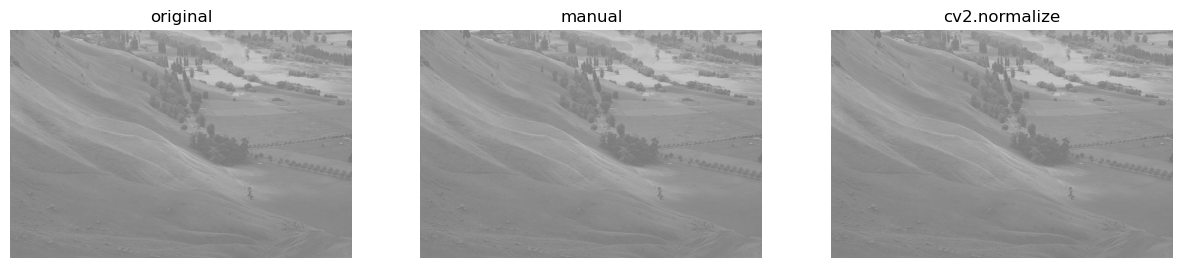

In [116]:
img = cv2.imread('./img/Hawkes.jpg', cv2.IMREAD_GRAYSCALE)
# 이미지 타입 변경
img_f = img.astype(np.float32)
# 이미지 정규화
img_norm = ((img_f - img_f.min()) * (255) / (img_f.max()-img.min()))
img_norm = img_norm.astype(np.uint8)

# OpenCV의 함수, cv2.normalize()
img_norm2 = cv2.normalize(img, None, 255,cv2.NORM_MINMAX)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_norm2 = cv2.cvtColor(img_norm, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize = (15,10))
plt.subplot(131), plt.axis('off'),plt.imshow(img),plt.title('original')
plt.subplot(132), plt.axis('off'),plt.imshow(img),plt.title('manual')
plt.subplot(133), plt.axis('off'),plt.imshow(img),plt.title('cv2.normalize')  


(<Axes: title={'center': 'cv2.normalize'}>,
 (np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0)),
 Text(0.5, 1.0, 'cv2.normalize'))

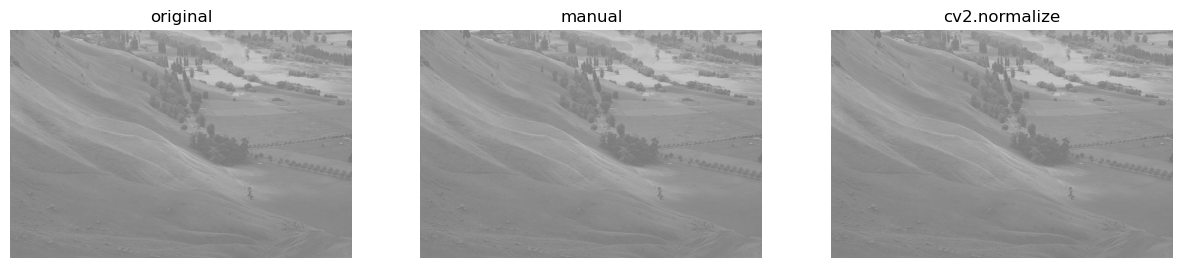

In [118]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img_norm],[0],None,[256],[0,256])
hist3 = cv2.calcHist([img_norm2],[0],None,[256],[0,256])

fig = plt.figure(figsize=(15,10))
plt.subplot(131), plt.axis('off'),plt.imshow(img),plt.title('original')
plt.subplot(132), plt.axis('off'),plt.imshow(img),plt.title('manual')
plt.subplot(133), plt.axis('off'),plt.imshow(img),plt.title('cv2.normalize')  